In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import palettable

import sys
sys.path.append('..')
from lib import *

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('../custom.mplstyle')
colors = palettable.matplotlib.Viridis_7.mpl_colors

In [2]:
phenotype = 'PBMC'
meta = pd.read_csv(data_directory + 'metadata-chu.csv', parse_dates=['date'])
subjects = meta['subject'].unique()
dfms = {}
times = {}
for subject in meta['subject'].unique():
    time, dfm = load_chu(subject, phenotype)
    dfms[subject] = dfm
    times[subject] = time

In [3]:
rankbins = np.array([0, 1000, 10000, 100000, 1e6])
endbin = 1000
histss = []
for subject in range(1, 4):
    dfm = dfms[subject]
    rank_start = dfm['counts_0'].rank(ascending=False, method='first')
    hists = []
    for i in range(0, 8):
        rank_end = dfm['counts_'+str(i)].rank(ascending=False, method='first')
        hist, bins = np.histogram(rank_start[rank_end<=endbin], bins=rankbins+0.1)
        hist = list(hist)
        hist.append(endbin-np.sum(hist))
        hists.append(hist)
    histss.append(hists)

In [4]:
sizes = ['$10^%g$'%int(np.log10(i)) for i in rankbins[1:]]
sizes.append('ND')

In [5]:
def plot(ax, time, sizes, hists):
    df = pd.DataFrame(dict(size=sizes*len(time),
                       fraction=np.array(hists).flatten()/endbin,
                       times=(time[:, np.newaxis]*np.ones(len(hists[0]), dtype=int).T).flatten()))
    dfp = df.pivot(index='times', columns='size', values='fraction')
    dfpcum = dfp.cumsum(axis='columns')
    ax.fill_between(dfp.index, [0.0]*dfp.shape[0], dfpcum.iloc[:, 0], color=colors[0])
    for i in range(4):
        ax.fill_between(dfp.index, dfpcum.iloc[:, i], dfpcum.iloc[:, i+1], color=colors[i+1])
    for t in time[1:]:
        ax.axvline(t, c='grey')
        ax.arrow(t, 1.1, 0.0, -0.05, color='grey', width=0.0005, head_width=0.003, clip_on=False)
    ax.set_ylim(0.0, 1.0)
    ax.set_xlim(min(time[1:])-0.01, max(time)+0.01)
    ax.set_xlabel('Time difference in years')
    handles = []
    for i, size in enumerate(sizes):
        print(size)
        patch = mpatches.Patch(color=colors[i], label=size)
        handles.append(patch)
    return handles

$10^3$
$10^4$
$10^5$
$10^6$
ND
$10^3$
$10^4$
$10^5$
$10^6$
ND
$10^3$
$10^4$
$10^5$
$10^6$
ND


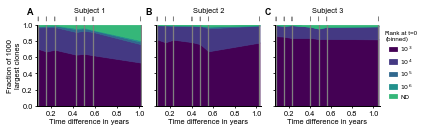

In [6]:
fig, axes = plt.subplots(figsize=(2.0*3, 1.9), ncols=3, sharey=True)
for subject in range(1, 4):
    ax = axes[subject-1]
    time = times[subject]
    hists = histss[subject-1]
    handles = plot(ax, time=time, sizes=sizes, hists=hists)
    ax.set_title('Subject %g'%subject, pad=13.0, fontsize='small')
    ax.set_xticks(np.arange(0.2, 1.1, 0.2))

axes[0].set_ylabel('Fraction of 1000\nlargest clones')
axes[-1].legend(handles=handles, title='Rank at t=0\n(binned)', loc='upper left', bbox_to_anchor=(1.0, 1.0))
fig.tight_layout()
label_axes(axes, xy=(-0.1, 1.1), va='bottom')
fig.savefig(figure_directory + 'chu_origin_large_clones.svg')

$10^3$
$10^4$
$10^5$
$10^6$
ND


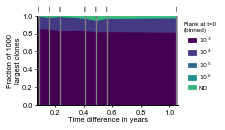

In [7]:
fig, ax = plt.subplots(figsize=(3.2, 1.9))
subject = 3
time = times[subject]
hists = histss[subject-1]
handles = plot(ax, time=time, sizes=sizes, hists=hists)
ax.set_ylabel('Fraction of 1000\nlargest clones')
ax.legend(handles=handles, title='Rank at t=0\n(binned)', loc='upper left', bbox_to_anchor=(1.0, 1.0))
fig.tight_layout()
label_axes(axes, xy=(-0.1, 1.1), va='bottom')
fig.savefig(figure_directory + 'chu_origin_large_clones_3.svg')